# Actividad: 2.4.1 Detección de objetos

Bruno Manuel Zamora Garcia A01798275

## Segunda parte

### 1. Aumento de las imagenes (clases: crema, audifonos, llaves, figura, mouse)

In [4]:
import cv2
import numpy as np
from pathlib import Path

# ---------- SETTINGS (ajusta estas rutas) ----------
SRC_DIR     = Path("/home/brunene/Documents/fotos")               # Carpeta con subcarpetas por clase
DST_DIR     = Path("/home/brunene/Documents/fotos_aumentadas")    # Carpeta donde se guardarán las aumentadas
TARGET_SIZE = (256, 256)
VALID_EXTS  = {'.jpg', '.jpeg', '.png', '.ppm'}

# ---------- AUGMENTATION FUNCTIONS ----------
def adjust_brightness(img, gain=1.3, bias=40):
    """Aumenta brillo."""
    return cv2.addWeighted(img, gain, np.zeros_like(img), 0, bias)

def apply_sharpen(img):
    """Aplica kernel de nitidez."""
    k = np.array([[ 0, -1,  0],
                  [-1,  6, -1],
                  [ 0, -1,  0]], dtype=np.float32)
    return cv2.filter2D(img, -1, k)

def contrast_clahe(img, clip=2.0, grid=(8,8)):
    """Mejora contraste con CLAHE en canal L."""
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=clip, tileGridSize=grid)
    l2 = clahe.apply(l)
    merged = cv2.merge((l2, a, b))
    return cv2.cvtColor(merged, cv2.COLOR_LAB2BGR)

def add_gaussian_noise(img, mean=0, stddev=25):
    """Añade ruido gaussiano."""
    noise = np.zeros(img.shape, dtype=np.int16)
    cv2.randn(noise, mean, stddev)
    noisy = img.astype(np.int16) + noise
    return np.clip(noisy, 0, 255).astype(np.uint8)

def rotate_image(img, angle=15):
    """Rota alrededor del centro."""
    h, w = img.shape[:2]
    M = cv2.getRotationMatrix2D((w//2, h//2), angle, 1.0)
    return cv2.warpAffine(img, M, (w, h), borderMode=cv2.BORDER_REFLECT)

AUG_FUNCTIONS = [
    adjust_brightness,
    apply_sharpen,
    contrast_clahe,
    add_gaussian_noise,
    rotate_image
]

# ---------- MAIN PROCESS ----------
if not SRC_DIR.is_dir():
    print(f"Carpeta de entrada no existe: {SRC_DIR}")
    exit(1)

DST_DIR.mkdir(parents=True, exist_ok=True)

# Recorre cada subcarpeta de clase
for class_folder in SRC_DIR.iterdir():
    if not class_folder.is_dir():
        continue
    class_name = class_folder.name
    out_class_dir = DST_DIR / class_name
    out_class_dir.mkdir(parents=True, exist_ok=True)

    for img_path in class_folder.iterdir():
        if img_path.suffix.lower() not in VALID_EXTS:
            continue

        img = cv2.imread(str(img_path))
        if img is None:
            print(f"No se pudo leer {img_path.name}")
            continue

        # Redimensionar
        base = img_path.stem
        resized = cv2.resize(img, TARGET_SIZE, interpolation=cv2.INTER_AREA)

        # Aplicar todas las aumentaciones
        for idx, func in enumerate(AUG_FUNCTIONS, start=1):
            aug = func(resized)
            out_name = f"{base}_aumentda {idx}{img_path.suffix}"
            cv2.imwrite(str(out_class_dir / out_name), aug)
            print(f"Nueva imagen generada: {class_name} / {out_name}")

print("\n✔️ Aumentación completada para todas las clases.")


Nueva imagen generada: llaves / IMG_0832_aumentda 1.jpg
Nueva imagen generada: llaves / IMG_0832_aumentda 2.jpg
Nueva imagen generada: llaves / IMG_0832_aumentda 3.jpg
Nueva imagen generada: llaves / IMG_0832_aumentda 4.jpg
Nueva imagen generada: llaves / IMG_0832_aumentda 5.jpg
Nueva imagen generada: llaves / IMG_0839_aumentda 1.jpg
Nueva imagen generada: llaves / IMG_0839_aumentda 2.jpg
Nueva imagen generada: llaves / IMG_0839_aumentda 3.jpg
Nueva imagen generada: llaves / IMG_0839_aumentda 4.jpg
Nueva imagen generada: llaves / IMG_0839_aumentda 5.jpg
Nueva imagen generada: llaves / IMG_0835_aumentda 1.jpg
Nueva imagen generada: llaves / IMG_0835_aumentda 2.jpg
Nueva imagen generada: llaves / IMG_0835_aumentda 3.jpg
Nueva imagen generada: llaves / IMG_0835_aumentda 4.jpg
Nueva imagen generada: llaves / IMG_0835_aumentda 5.jpg
Nueva imagen generada: llaves / IMG_0842_aumentda 1.jpg
Nueva imagen generada: llaves / IMG_0842_aumentda 2.jpg
Nueva imagen generada: llaves / IMG_0842_aumentd

2. Generacion del modelo

/home/brunene/anaconda3/envs/iatec/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 760ms/step - accuracy: 0.2889 - loss: 2.9435 - val_accuracy: 0.3200 - val_loss: 1.1594
Epoch 2/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 706ms/step - accuracy: 0.7745 - loss: 0.6524 - val_accuracy: 0.9400 - val_loss: 0.1904
Epoch 3/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 714ms/step - accuracy: 0.8906 - loss: 0.2486 - val_accuracy: 0.9200 - val_loss: 0.2450
Epoch 4/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 717ms/step - accuracy: 0.9807 - loss: 0.1015 - val_accuracy: 0.9400 - val_loss: 0.1335
Epoch 5/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 704ms/step - accuracy: 0.9756 - loss: 0.0580 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 6/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 724ms/step - accuracy: 0.9782 - loss: 0.0621 - val_accuracy: 0.9600 - val_loss: 0.0719
Epoch 7/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 712ms/step - accuracy: 0.9774 - loss: 0.0659 - val_accuracy: 0.9800 - val_loss: 0.0571
Epoch 8/15
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 709ms/step - accuracy: 0.9931 - loss: 0.0338 - val_accuracy: 1.0000 - val_loss:

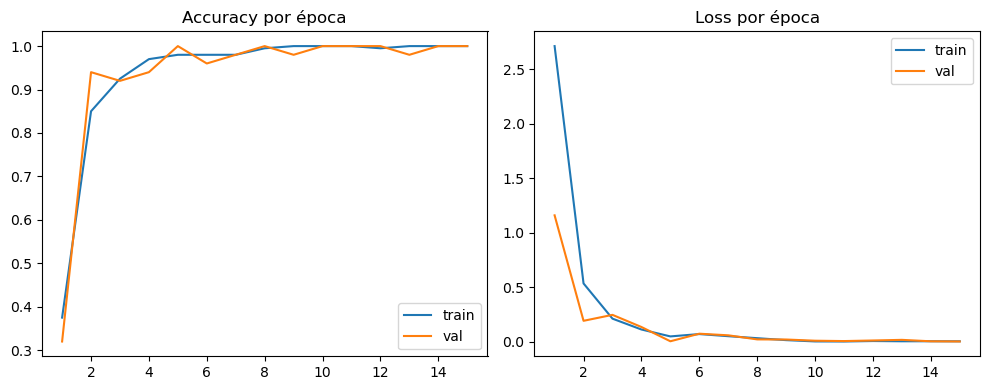

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step

📋 Reporte de Clasificación:
              precision    recall  f1-score   support

       crema       1.00      1.00      1.00        10
   audifonos       1.00      1.00      1.00        10
      figura       1.00      1.00      1.00        10
      llaves       1.00      1.00      1.00        10
       mouse       1.00      1.00      1.00        10

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



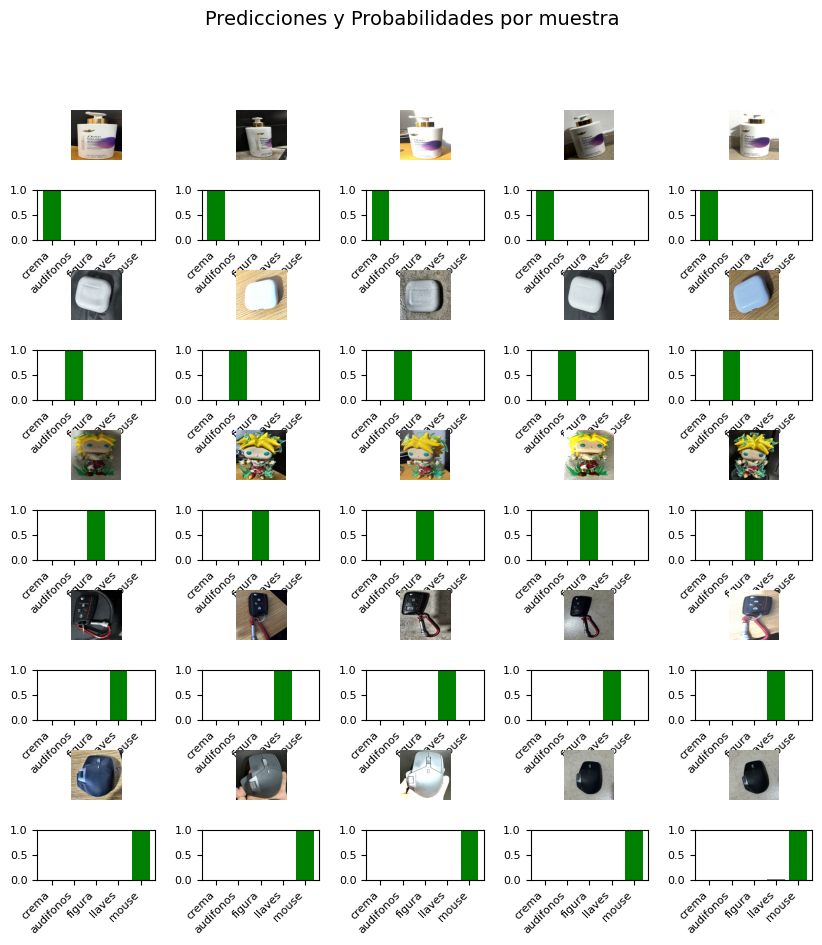


💾 Modelo guardado en: modelo_objetos.h5


In [ ]:
import os
from pathlib import Path
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# ==== PARÁMETROS ====
IMG_DIM           = 256
BASE_PATH         = Path("/home/brunene/Documents/fotos_aumentadas")         # carpeta raíz con subcarpetas por clase
CLASS_LABELS      = ["crema", "audifonos", "figura", "llaves", "mouse"]
MODEL_PATH        = "modelo_objetos.h5"
SEED              = 123
SAMPLES_PER_CLASS = 5

# ==== CARGA DE IMÁGENES ====
def cargar_imagenes(root: Path, etiquetas: list, size: int):
    imgs, labs, idxs = [], [], []
    for i, label in enumerate(etiquetas):
        carpeta = root / label
        if not carpeta.is_dir():
            print(f"⚠️ Carpeta ausente: {carpeta}")
            continue
        for img_file in carpeta.iterdir():
            if img_file.suffix.lower() not in {".jpg", ".jpeg", ".png"}:
                continue
            img = cv2.imread(str(img_file))
            if img is None:
                continue
            img = cv2.resize(img, (size, size))
            imgs.append(img)
            labs.append(i)
            idxs.append(i)
    X = np.array(imgs, dtype="float32") / 255.0
    Y = to_categorical(labs, num_classes=len(etiquetas))
    return X, Y, np.array(idxs)

# ==== CONSTRUCCIÓN DE LA CNN ====
def construir_cnn(input_shape, n_classes):
    modelo = Sequential([
        Conv2D(32, 3, activation="relu", padding="same", input_shape=input_shape),
        MaxPooling2D(2),
        Conv2D(64, 3, activation="relu", padding="same"),
        MaxPooling2D(2),
        Conv2D(128, 3, activation="relu", padding="same"),
        MaxPooling2D(2),
        Flatten(),
        Dense(128, activation="relu"),
        Dropout(0.4),
        Dense(n_classes, activation="softmax")
    ])
    modelo.compile(
        optimizer=Adam(1e-3),
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    return modelo

# ==== PLOTS DE ENTRENAMIENTO ====
def graficar_historia(hist):
    e = range(1, len(hist.history["loss"]) + 1)
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(e, hist.history["accuracy"], label="train")
    plt.plot(e, hist.history["val_accuracy"], label="val")
    plt.title("Accuracy por época")
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(e, hist.history["loss"], label="train")
    plt.plot(e, hist.history["val_loss"], label="val")
    plt.title("Loss por época")
    plt.legend()
    plt.tight_layout()
    plt.show()

# ==== MOSAICO DE PREDICCIONES ====
def graficar_mosaico_predicciones(X_val, Y_val, preds, etiquetas, muestras_por_clase):
    y_true = np.argmax(Y_val, axis=1)
    n_classes = len(etiquetas)
    n = muestras_por_clase

    fig = plt.figure(figsize=(n*2, n_classes*2))
    gs = gridspec.GridSpec(n_classes*2, n, figure=fig, hspace=0.6, wspace=0.4)

    for cls in range(n_classes):
        # índices de las n primeras muestras de la clase cls
        idxs = np.where(y_true == cls)[0][:n]
        for j, idx in enumerate(idxs):
            # 1) subplot de imagen
            ax_img = fig.add_subplot(gs[cls*2, j])
            img_rgb = cv2.cvtColor((X_val[idx]*255).astype(np.uint8), cv2.COLOR_BGR2RGB)
            ax_img.imshow(img_rgb)
            ax_img.axis('off')
            if j == 0:
                ax_img.set_ylabel(etiquetas[cls], fontsize=12)

            # 2) subplot de barras
            ax_bar = fig.add_subplot(gs[cls*2+1, j])
            probs = preds[idx]
            colors = ['gray'] * n_classes
            colors[cls] = 'green'
            ax_bar.bar(etiquetas, probs, color=colors)
            ax_bar.set_ylim(0, 1)
            ax_bar.set_xticks(range(n_classes))
            ax_bar.set_xticklabels(etiquetas, rotation=45, ha='right', fontsize=8)
            ax_bar.tick_params(axis='y', labelsize=8)

    fig.suptitle("Predicciones y Probabilidades por muestra", fontsize=14)
    plt.show()

# ==== FLUJO PRINCIPAL ====
def main():
    # 1) cargar y normalizar
    X, Y, idxs = cargar_imagenes(BASE_PATH, CLASS_LABELS, IMG_DIM)
    if X.size == 0:
        print("❌ No se cargaron imágenes. Verifica rutas.")
        return

    # 2) dividir train/val
    X_tr, X_val, Y_tr, Y_val = train_test_split(
        X, Y, test_size=0.2, stratify=idxs, random_state=SEED
    )

    # 3) construir y entrenar
    cnn = construir_cnn((IMG_DIM, IMG_DIM, 3), len(CLASS_LABELS))
    history = cnn.fit(
        X_tr, Y_tr,
        validation_data=(X_val, Y_val),
        epochs=15,
        batch_size=32
    )

    # 4) mostrar métricas de entrenamiento
    graficar_historia(history)

    # 5) evaluación y reporte
    preds = cnn.predict(X_val)
    y_true = np.argmax(Y_val, axis=1)
    y_pred = np.argmax(preds, axis=1)
    print("\n📋 Reporte de Clasificación:")
    print(classification_report(y_true, y_pred, target_names=CLASS_LABELS))

    # 6) mosaico: 5 muestras de cada clase con su barra de probabilidades
    graficar_mosaico_predicciones(X_val, Y_val, preds, CLASS_LABELS, SAMPLES_PER_CLASS)

    # 7) guardar modelo
    cnn.save(MODEL_PATH)
    print(f"\n💾 Modelo guardado en: {MODEL_PATH}")

if __name__ == "__main__":
    main()


3. Despliegue del modelo con la camara (use droid_cam porque mi computadora no tiene camara integrada)

In [11]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# ==== CARGA DEL MODELO Y AUTODETECCIÓN DE TAMAÑO ====
model = load_model('modelo_objetos.h5')
_, H_in, W_in, _ = model.input_shape      # e.g. (None, 128, 128, 3)
IMG_SIZE = (W_in, H_in)

# ==== PARÁMETROS DE PROCESO ====
FONT           = cv2.FONT_HERSHEY_SIMPLEX
CONF_THRESHOLD = 0.8
CLASSES        = ['crema','audifonos','figura','llaves','mouse']

# ==== STREAMING DESDE DROIDCAM ====
URL = 'http://192.168.0.104:4747/video'
cap = cv2.VideoCapture(URL)
if not cap.isOpened():
    print("❌ No se pudo conectar a DroidCam.")
    exit(1)

# Fija resolución de captura (puedes bajarla para acelerar)
CAP_W, CAP_H = 320, 240
cap.set(cv2.CAP_PROP_FRAME_WIDTH,  CAP_W)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, CAP_H)

# Precrea la ventana
window_name = "Detección en Vivo (DroidCam)"
cv2.namedWindow(window_name, cv2.WINDOW_NORMAL)
cv2.resizeWindow(window_name, 640, 480)

# Precalienta el grafo de ejecución (warm-up)
ret, frame = cap.read()
if ret:
    dummy = cv2.resize(frame, IMG_SIZE)
    _ = model.predict(np.expand_dims(dummy.astype('float32')/255,axis=0), verbose=0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # 1) Redimensiona y normaliza
    small   = cv2.resize(frame, (CAP_W, CAP_H), interpolation=cv2.INTER_AREA)
    display = cv2.resize(small, (CAP_W*2, CAP_H*2))
    inp     = cv2.resize(small, IMG_SIZE, interpolation=cv2.INTER_AREA)
    inp     = inp.astype('float32')/255.0
    inp     = np.expand_dims(inp, axis=0)

    # 2) Inferencia
    #    usa predict_on_batch para un poco más de velocidad
    probs = model.predict_on_batch(inp)[0]
    idx   = np.argmax(probs)
    conf  = probs[idx]

    # 3) Si detecta algo, dibuja el recuadro en TODO el display
    if conf >= CONF_THRESHOLD:
        label = f"{CLASSES[idx]} {conf*100:.0f}%"
        h_disp, w_disp = display.shape[:2]
        cv2.rectangle(display, (0,   0),
                              (w_disp, h_disp),
                      (0,255,0), 2)
        cv2.putText(display, label, (10, 30),
                    FONT, 1.0, (0,255,0), 2, cv2.LINE_AA)

    cv2.imshow(window_name, display)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


### Analisis del modelo

A pesar de que el modelo demuestra una precisión de detección notable en condiciones óptimas, he observado que su rendimiento decae cuando el objeto se encuentra a una distancia media o lejana: en esos casos la confianza disminuye y, en ocasiones, llega a clasificar erróneamente un objeto como otra de las cinco categorías. Este comportamiento indica que la red no está aprendiendo suficientemente características invariantes a la escala ni a la resolución, por lo que pierde capacidad de generalización cuando el objeto ocupa pocos píxeles en la imagen.

Otro aspecto crítico es la dependencia del ángulo de toma: actualmente el detector solo reconoce el objeto con fiabilidad cuando la cámara reproduce vistas muy similares a las del conjunto de entrenamiento. Cualquier ligera rotación, inclinación o cambio en la perspectiva provoca que el modelo confunda clases —por ejemplo, asignando erróneamente varias detecciones a “llaves” aunque se trate de un “mouse” o una “crema”—, como se ve en el vídeo de validación, donde “llaves” domina el mapa de calor de predicciones con mucha más frecuencia que las demás clases.

Para reforzar la robustez de la detección, considero imprescindible ampliar el dataset de entrenamiento incluyendo:

- Varias distancias: primer plano, tres cuartos y plano lejano, para que la red aprenda patrones a diferentes escalas.

- Múltiples ángulos: capturas cenitales, laterales, inclinadas y contrapicadas, de manera que el modelo se familiarice con la geometría del objeto desde toda perspectiva.

- Diversidad de iluminación y fondos: entornos interiores y exteriores, luces naturales y artificiales, fondos homogéneos y texturizados, para reducir la sensibilidad a los cambios de contraste y color.

- Técnicas de augmentación: rotaciones aleatorias, zoom, recortes, variaciones de brillo/contraste y ruido, aplicadas en tiempo de entrenamiento para simular condiciones reales dinámicamente.

Con estas medidas, el detector aprenderá características más generales y discriminativas, minimizando las falsas alarmas y mejorando su capacidad de reconocer cada clase con independencia de distancia, ángulo o variaciones ambientales. Además, una estrategia de validación continua (por ejemplo, añadiendo progresivamente ejemplos recién capturados y recalibrando el umbral de confianza) garantizará que el rendimiento se mantenga estable a medida que el sistema se enfrente a escenarios del mundo real.